# 虎の巻：実装解説

---

IBM Community Japan　ナレッジモール研究  
量子コンピューターの活用研究 — 機械学習・量子化学計算・組み合わせ最適化への適用 —

---

In [ ]:
from qiskit import QuantumCircuit,ClassicalRegister,QuantumRegister,BasicAer,execute,assemble,IBMQ
from qiskit.visualization import *
from qiskit.quantum_info import *
from qiskit.tools import job_monitor
from qiskit.extensions import RXGate, XGate, CXGate
import numpy as np
import qiskit.tools.jupyter
provider = IBMQ.load_account()

## Section 1: Perform Operations on Quantum Circuits

### 量子回路の作り方

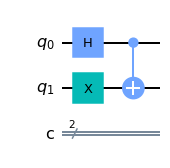

In [ ]:
qc = QuantumCircuit(2,2) #(量子ビット数,古典ビット数)
qc.h(0)
qc.x(1)
qc.cx(0,1)

qc.draw(output='mpl')  

In [ ]:
qc.qubits

[Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)]

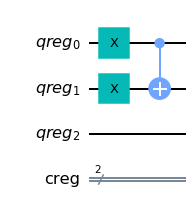

In [ ]:
qr=QuantumRegister(3,'qreg')   #量子レジスタに名前をつける
cr=ClassicalRegister(2,'creg') #古典レジスタに名前をつける
qc = QuantumCircuit(cr,qr)
qc.x(qr[0:2])
qc.cx(qr[0],qr[1])

qc.draw(output='mpl')

### 量子回路の測定方法

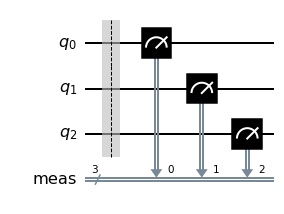

In [ ]:
qc=QuantumCircuit(3)
qc.measure_all()

qc.draw(output='mpl')

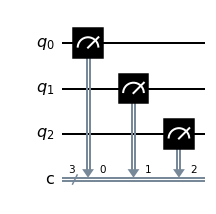

In [ ]:
qc = QuantumCircuit(3,3)
qc.measure([0,1,2],[0,1,2]) #(測定する量子ビット,結果を書き込む古典ビット)

qc.draw(output='mpl')

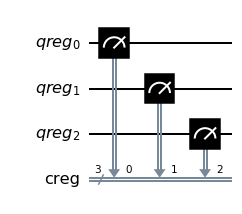

In [ ]:
cr=ClassicalRegister(3,'creg')
qr=QuantumRegister(3,'qreg')
qc = QuantumCircuit(cr,qr)
qc.measure(qr[0:3],cr[0:3])

qc.draw(output='mpl')

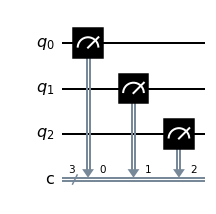

In [ ]:
qc = QuantumCircuit(3,3)
qc.measure(range(3),range(3))

qc.draw(output='mpl')

### 単一量子ゲート

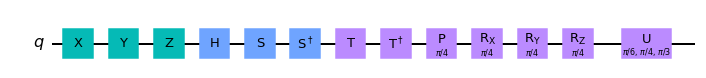

In [ ]:
qc=QuantumCircuit(1)

#パウリゲート
qc.x(0)
qc.y(0)
qc.z(0)

#アダマールゲート
qc.h(0)

#位相ゲート
qc.s(0)
qc.sdg(0) #s†ゲート 位相(π/2)逆回転
qc.t(0)
qc.tdg(0) #T†ゲート 位相(π/4)逆回転
qc.p(np.pi/4,0)

#回転ゲート
qc.rx(np.pi/4,0)
qc.ry(np.pi/4,0)
qc.rz(np.pi/4,0)

#ユニバーサルゲート
qc.u(np.pi/6,np.pi/4,np.pi/3,0) #(θ,φ,λ)

qc.draw(output='mpl')

### 複数量子ゲート

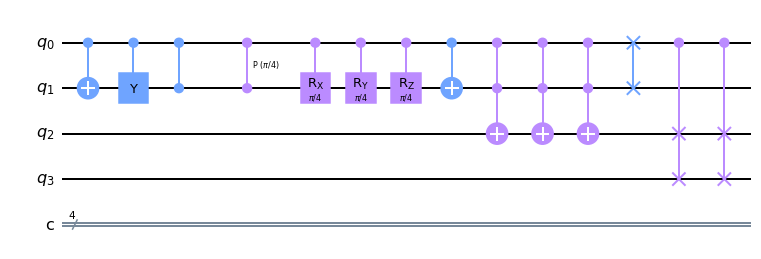

In [ ]:
qc=QuantumCircuit(4, 4)

qc.cx(0,1) #(Controlledビット,Targetビット)
qc.cy(0,1)
qc.cz(0,1)

qc.cp(np.pi/4,0,1) #(回転角度,Controlledビット,Targetビット)
qc.crx(np.pi/4,0,1)
qc.cry(np.pi/4,0,1)
qc.crz(np.pi/4,0,1)

qc.mct([0],1) #第１引数(複数ビット指定可)が全て1の時のみ第２引数をNOT
qc.ccx(0,1,2)
qc.toffoli(0,1,2)

qc.mct([0,1],2) #第１引数(複数ビット指定可)が全て1の時のみ第２引数をNOT
qc.swap(0,1)
qc.cswap([0],[2],3) #(Controlledビット,swapするビット,swapするビット)
qc.cswap(0,2,3)

qc.draw(output='mpl')

### barrier演算子

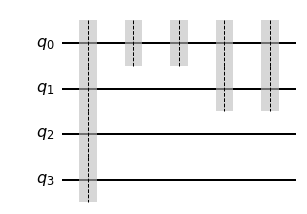

In [ ]:
qc=QuantumCircuit(4)

qc.barrier()
qc.barrier(0)
qc.barrier([0])
qc.barrier(0,1)
qc.barrier([0,1])

qc.draw(output='mpl')

### 量子回路の深さ

7


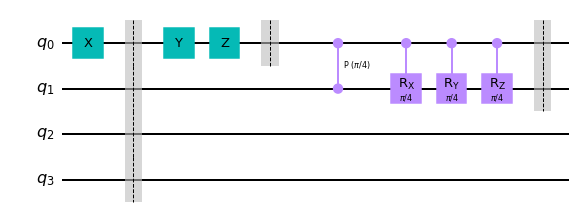

In [ ]:
qc=QuantumCircuit(4)

qc.x(0)
qc.barrier()
qc.y(0)
qc.z(0)
qc.barrier(0)
qc.cp(np.pi/4,0,1)
qc.crx(np.pi/4,0,1)
qc.cry(np.pi/4,0,1)
qc.crz(np.pi/4,0,1)
qc.barrier([0,1])

print(qc.depth()) #量子回路の深さを出力
qc.draw(output='mpl')

### 量子回路の合体

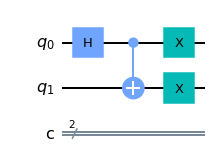

In [ ]:
#ビット数が同じ時 ①compose
qc1 = QuantumCircuit(2,2)
qc1.h(0)
qc1.cx(0,1)

qc2 = QuantumCircuit(2,2)
qc2.x(0)
qc2.x(1)

new_qc = qc1.compose(qc2,[0,1])
new_qc.draw(output='mpl')

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  # Remove the CWD from sys.path while we load stuff.


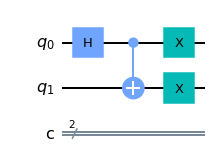

In [ ]:
#ビット数が同じ時 ②+（非推奨　警告あり）
qc1 = QuantumCircuit(2,2)
qc1.h(0)
qc1.cx(0,1)

qc2 = QuantumCircuit(2,2)
qc2.x(0)
qc2.x(1)

new_qc = qc1 + qc2 
new_qc.draw(output='mpl')

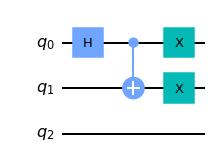

In [ ]:
#ビット数が異なる時 ①compose
qc1 = QuantumCircuit(3)
qc1.h(0)
qc1.cx(0,1)

qc2 = QuantumCircuit(2)
qc2.x(0)
qc2.x(1)

new_qc = qc1.compose(qc2,[0,1])
new_qc.draw(output='mpl')

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  del sys.path[0]


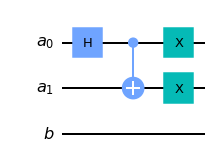

In [ ]:
#ビット数が異なる時②+（非推奨　警告あり）
qc_a = QuantumRegister(2, "a")
qc_b = QuantumRegister(1, "b")
qc1 = QuantumCircuit(qc_a,qc_b)
qc1.h(0)
qc1.cx(0,1)

qc2 = QuantumCircuit(QuantumRegister(2, "a"))
qc2.x(0)
qc2.x(1)

#ビット数が異なると時、レジスタの名前が一緒ならOK、違うとエラー
new_qc = qc1 + qc2  
new_qc.draw(output='mpl')

### QASMへの変換、QASMデータの実行

In [ ]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.x(1)
qc.cx(0,1)

#qasmファイル作成
new_qc.qasm()  

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg a[2];\nqreg b[1];\nh a[0];\ncx a[0],a[1];\nx a[0];\nx a[1];\n'

In [ ]:
print(new_qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg a[2];
qreg b[1];
h a[0];
cx a[0],a[1];
x a[0];
x a[1];



In [ ]:
#filename指定でQASMファイルを保存

new_qc.qasm(formatted=True,filename='my_circuit.qasm')

OPENQASM 2.0;
include "qelib1.inc";
qreg a[2];
qreg b[1];
h a[0];
cx a[0],a[1];
x a[0];
x a[1];



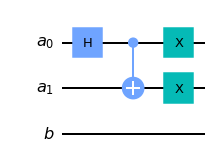

In [ ]:
#保存したQASMファイルを保存実行

new_qc2=QuantumCircuit.from_qasm_file('my_circuit.qasm')
new_qc2.draw('mpl')

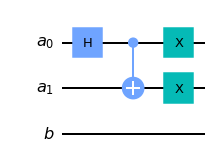

In [ ]:
#直接入力したQASMコードを実行

code='''OPENQASM 2.0; 
include "qelib1.inc";
qreg a[2];
qreg b[1];
h a[0];
cx a[0],a[1];
x a[0];
x a[1];'''

QuantumCircuit.from_qasm_str(code).draw('mpl')

## Section 2: Executing Experiments

### 量子回路の実行方法

execute引数確認
https://qiskit.org/documentation/locale/ja_JP/apidoc/execute.html

In [ ]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
backend = BasicAer.get_backend('qasm_simulator') #バックエンド指定
job = execute(qc, backend, shots=1024)           #実行
job.result().get_counts()

{'00 00': 527, '11 00': 497}

## Section 3: Implement BasicAer: Python-based Simulators

### BasicAerのシミュレータの使用方法

In [ ]:
# BasicAerのシミュレータは「qasm simulator」「statevector simulator」「unitary simulator」の３種類
BasicAer.backends()

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]

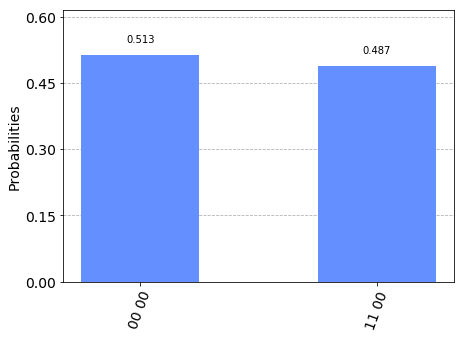

In [ ]:
# qasm simulator

qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
backend = BasicAer.get_backend('qasm_simulator')
counts=execute(qc, backend, shots=1024).result().get_counts()
plot_histogram(counts)

In [ ]:
# statevector simulator

qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
backend = BasicAer.get_backend('statevector_simulator')
statevector=execute(qc, backend).result().get_statevector(qc)
print(statevector)

[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


In [ ]:
# unitary simulator

qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
backend = BasicAer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()
print(unitary)
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]]


<IPython.core.display.Latex object>

### ランダム

In [ ]:
from qiskit.quantum_info import random_statevector
random_statevector(2)

Statevector([ 0.41692972-0.69178091j, -0.57610543+0.12534476j],
            dims=(2,))


In [ ]:
from qiskit.quantum_info import random_unitary
random_unitary(3)

Operator([[-0.57389821+0.14582668j, -0.65951319-0.16784163j,
           -0.31736606+0.29244784j],
          [ 0.29283221+0.74989803j,  0.06706565-0.47228339j,
           -0.27637856-0.21901535j],
          [ 0.03537554+0.00512149j, -0.52403834-0.18629534j,
            0.65097997-0.51538848j]],
         input_dims=(3,), output_dims=(3,))

## Section 4: Implement Qasm

補足解説　Section 4: Implement Qasm, a:Read a QASM file and string 「OpenQASMの読み込み」参照

## Section 5: Compare and Contrast Quantum Information

### Operatorの使用方法

In [ ]:
Q= Operator([0, 0, 0, 1])
print(Q)
array_to_latex(Q, prefix="\\text{Circuit = }\n")

Operator([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
         input_dims=(), output_dims=(2, 2))


<IPython.core.display.Latex object>

In [ ]:
Q = Operator([[0, 0, 0, 1]])
print(Q)
array_to_latex(Q, prefix="\\text{Circuit = }\n")

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2), output_dims=())


<IPython.core.display.Latex object>

In [ ]:
XX = Operator([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])
print(XX)
array_to_latex(XX, prefix="\\text{Circuit = }\n")

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


<IPython.core.display.Latex object>

In [ ]:
XX =Operator(Pauli(label='XX'))
print(XX)
array_to_latex(XX, prefix="\\text{Circuit = }\n")

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


<IPython.core.display.Latex object>

In [ ]:
X =Operator(Pauli(label='X'))
print(X)
array_to_latex(X, prefix="\\text{Circuit = }\n")

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


<IPython.core.display.Latex object>

### 演算子のテンソル積

In [ ]:
A = Operator(Pauli('X'))
B = Operator(Pauli('Z'))
C=A.tensor(B) #A✖︎B 
print(C)

Operator([[ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [ 0.+0.j, -0.+0.j,  0.+0.j, -1.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [ ]:
A = Operator(Pauli('X'))
B = Operator(Pauli('Z'))
C=A.expand(B) #B✖︎A 
print(C)

Operator([[ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j, -0.+0.j, -1.+0.j],
          [ 0.+0.j,  0.+0.j, -1.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [ ]:
array_to_latex(C, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

### 演算子の掛け算

In [ ]:
A = Operator(Pauli('X'))
B = Operator(Pauli('Z'))
A.compose(B) #行列BA

Operator([[ 0.+0.j,  1.+0.j],
          [-1.+0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [ ]:
A = Operator(Pauli('X'))
B = Operator(Pauli('Z'))
A.compose(B, front=True) #行列AB

Operator([[ 0.+0.j, -1.+0.j],
          [ 1.+0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))

### Operatorを使用した演算子比較

In [ ]:
Operator(Pauli(label='X')) == Operator(XGate())

True

In [ ]:
 #グローバル位相のずれは無視されないので結果はFalseになる
Operator(XGate()) == np.exp(1j * 0.5) * Operator(XGate()) 

False

### fidelityを使用した演算子比較

In [ ]:
#state_fidelity 量子状態間の忠実度

sta1 = [1,0,0,0]
sta2 = [1,0,0,0]
state_fidelity(sta1, sta2)

1.0

In [ ]:
#process_fidelity 演算子間の忠実度
#グローバル位相のずれは無視され、同一とみなされる

op_1 = Operator(XGate())
op_2 = np.exp(1j * 0.5) * Operator(XGate())
process_fidelity(op_1, op_2)

1.0

In [ ]:
#average_gate_fidelity 演算子間の平均忠実度
#グローバル位相のずれは無視され、同一とみなされる

op_1 = Operator(XGate())
op_2 = np.exp(1j * 0.5) * Operator(XGate())
average_gate_fidelity(op_1, op_2)

1.0

## Section 6: Return the Experiment Results

Section 3　参照

## Section 7: Use Qiskit Tools

### 実行したjobのステータス確認方法

In [ ]:
#実機での実行は時間がかかるためステータスを確認しながら実行
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0,1)
qc.measure_all()

backend = provider.get_backend('ibmq_manila') #'ibmq_manila'を使用する実機に置き換える
job=execute(qc, backend, shots=1024)
job_monitor(job)

Job Status: job has successfully run


In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0,1)
qc.measure_all()

backend = provider.get_backend('ibmq_manila') #'ibmq_manila'を使用する実機に置き換える
job=execute(qc, backend, shots=1024)
job.status()

<JobStatus.VALIDATING: 'job is being validated'>

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0,1)
qc.measure_all()

backend = provider.get_backend('ibmq_manila') #'ibmq_manila'を使用する実機に置き換える
job=execute(qc, backend, shots=1024)
job.wait_for_final_state()

In [ ]:
import qiskit.tools.jupyter
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

## Section 8: Display and Use System Information

### Qiskitのversionの表示方法

In [ ]:
#qiskit-terra パッケージのバージョンのみ
qiskit.__version__ 

'0.20.0'

In [ ]:
#インストールされている各 Qiskit パッケージのバージョン
qiskit.__qiskit_version__ 

{'qiskit-terra': '0.20.0', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.19.0', 'qiskit-aqua': None, 'qiskit': '0.36.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [ ]:
%qiskit_version_table

### %quiskit_backend_overview 

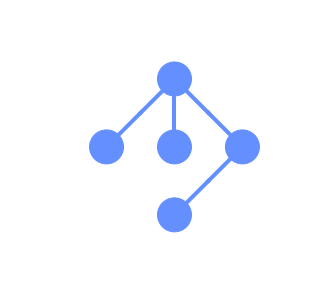

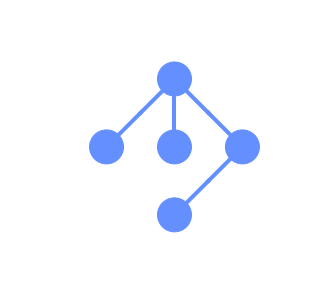

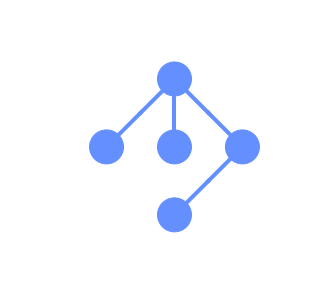

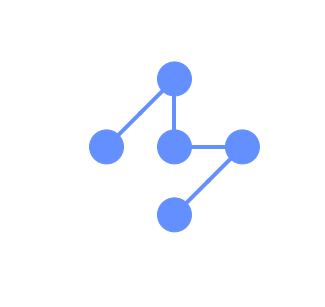

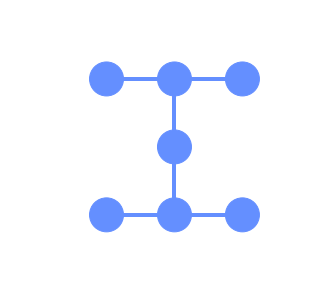

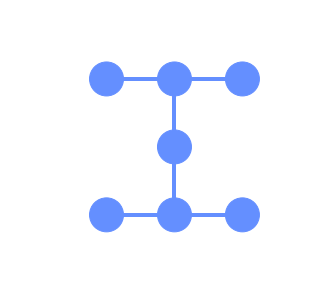

In [ ]:
%qiskit_backend_overview

## Section 9: Construct Visualizations

### 回路の描写方法

draw引数確認　https://qiskit.org/documentation/locale/ja_JP/stubs/qiskit.circuit.QuantumCircuit.draw.html?highlight=draw#qiskit.circuit.QuantumCircuit.draw

In [ ]:
# サンプル回路
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.barrier([0,1])
qc.cx(0, 1)

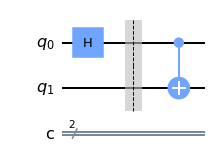

In [ ]:
qc.draw(output='mpl',) #引数outputが取りうる値　'text','mpl','latex','latex_source'

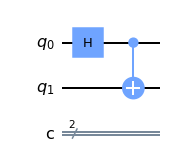

In [ ]:
qc.draw(output='mpl', plot_barriers=False, reverse_bits=False)   #バリアのプロット無効化、ビット順序の反転

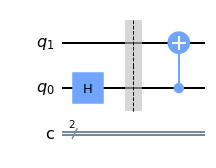

In [ ]:
qc.draw(output='mpl', plot_barriers=True, reverse_bits=True) 

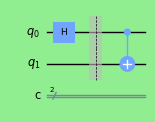

In [ ]:
style = {'backgroundcolor': 'lightgreen'}
qc.draw(output='mpl', style=style, scale=0.7)

circuit_drawer　https://qiskit.org/documentation/locale/ja_JP/stubs/qiskit.visualization.circuit_drawer.html?highlight=circuit_drawer#qiskit.visualization.circuit_drawer

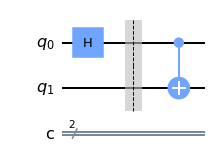

In [ ]:
circuit_drawer(qc, output='mpl')

### plot_histogram()メソッドの使用方法

In [ ]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend)

In [ ]:
job.result().get_counts()

{'00': 487, '11': 537}

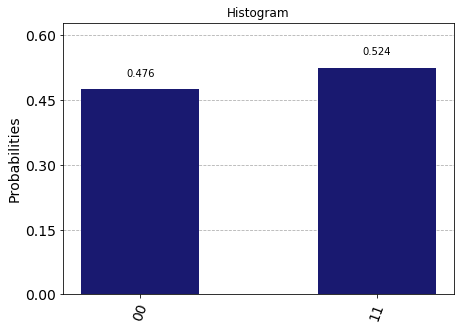

In [ ]:
plot_histogram(job.result().get_counts(), color='midnightblue', title="Histogram")

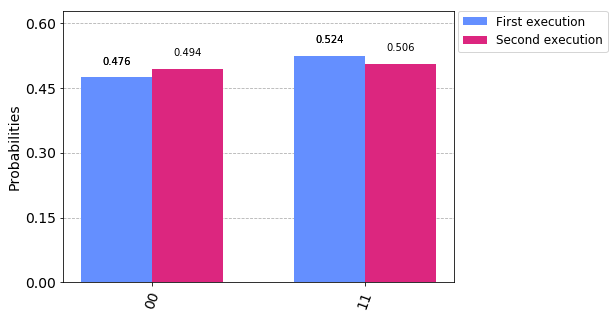

In [ ]:
counts=job.result().get_counts()
counts2 = execute(qc, backend).result().get_counts()

legend = ['First execution', 'Second execution']
plot_histogram([counts,counts2],  legend=legend)

### plot_bloch_multivector()メソッドの使用方法

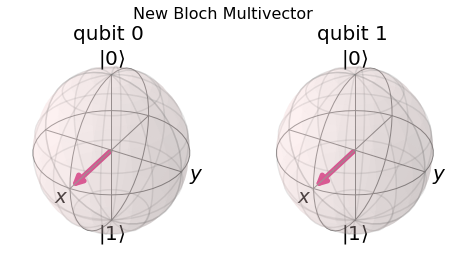

In [ ]:
#複数ビット表示可能　単一ビットも可
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state, title="New Bloch Multivector")

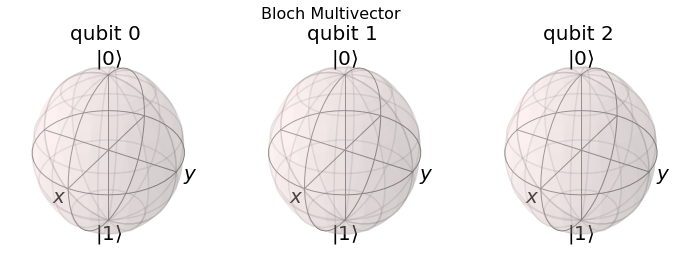

In [ ]:
qc_ghz = QuantumCircuit(3)
qc_ghz.h(0)
qc_ghz.cx(0,1)
qc_ghz.cx(0,2)

#エンタングル状態は表示ができない
state = Statevector.from_instruction(qc_ghz)
plot_bloch_multivector(state, title="Bloch Multivector")

### plot_bloch_vector()メソッドの使用方法

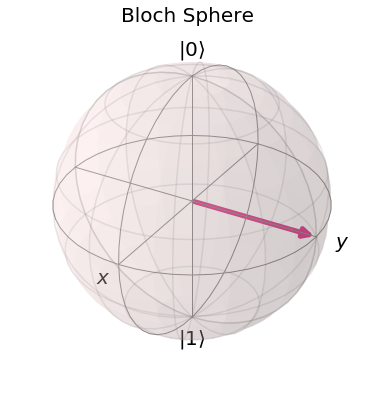

In [ ]:
#単一量子ビットのみ表示可能
plot_bloch_vector([0,1,0], title="Bloch Sphere") #デカルト座標

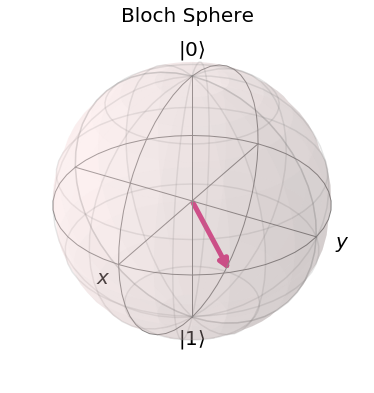

In [ ]:
plot_bloch_vector([1,np.pi/2,np.pi/4], coord_type='spherical',title="Bloch Sphere") #極座標

### plot_state_qsphere()メソッドの使用方法

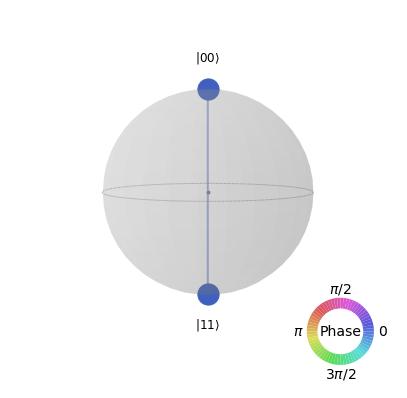

In [ ]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

state = Statevector.from_instruction(qc)
#エンタングル状態が表示可能
plot_state_qsphere(state)

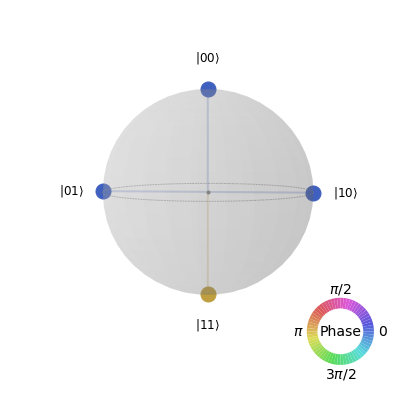

In [ ]:
qc = QuantumCircuit(2)
qc.h([0,1])
qc.cz(0,1)

state = Statevector.from_instruction(qc)
plot_state_qsphere(state)

### plot_state_city()メソッドの使用方法

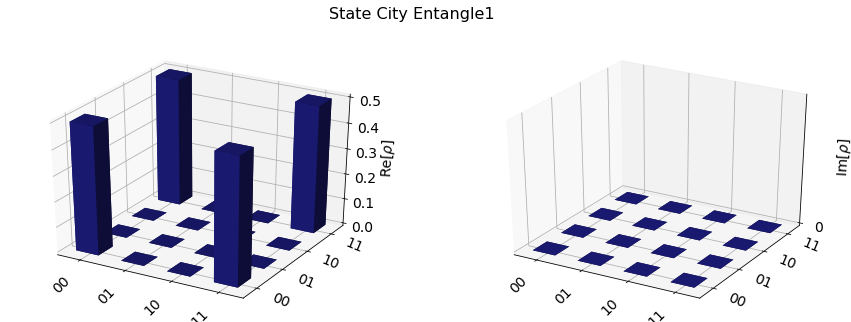

In [ ]:
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_city
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

state = DensityMatrix.from_instruction(qc)
plot_state_city(state, color=['midnightblue', 'midnightblue'],title="State City Entangle1")

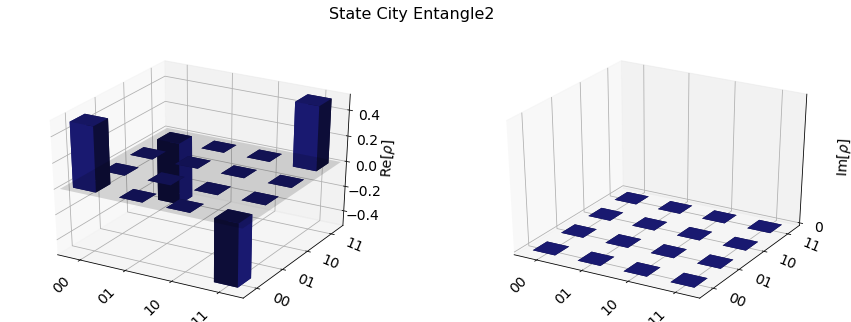

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.z(0)

state = DensityMatrix.from_instruction(qc)
plot_state_city(state, color=['midnightblue', 'midnightblue'],title="State City Entangle2")

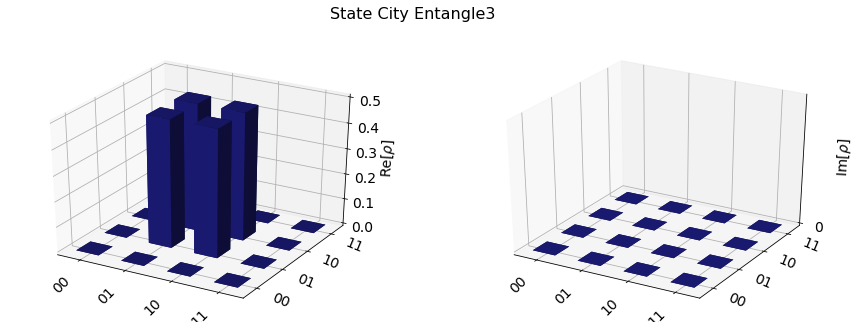

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0,1)

state = DensityMatrix.from_instruction(qc)
plot_state_city(state, color=['midnightblue', 'midnightblue'],title="State City Entangle3")

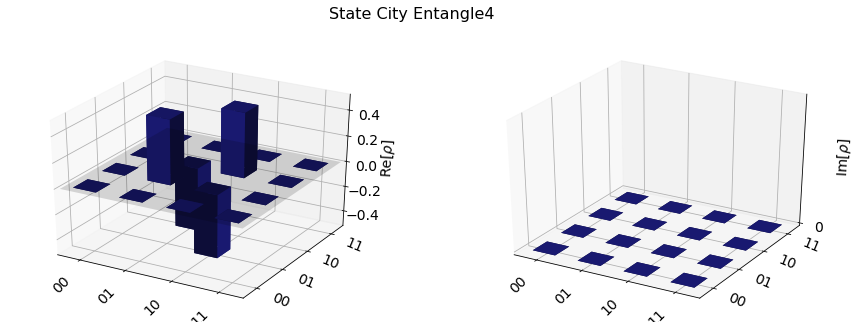

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0,1)
qc.z(0)

state = DensityMatrix.from_instruction(qc)
plot_state_city(state, color=['midnightblue', 'midnightblue'],title="State City Entangle4")

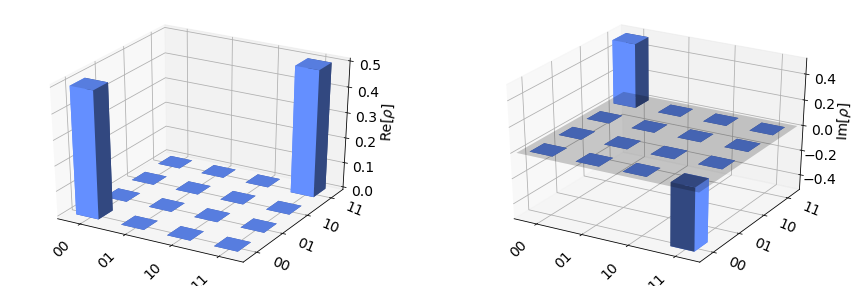

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.s(0)

state = DensityMatrix.from_instruction(qc)
plot_state_city(state)

### plot_state_hinton()メソッドの使用方法

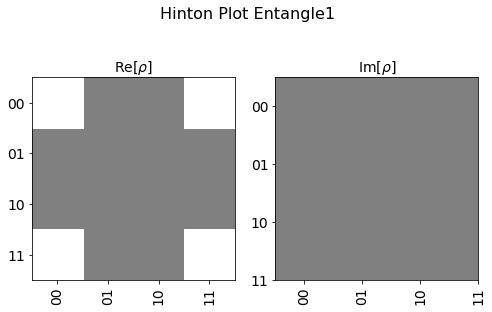

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

state = DensityMatrix.from_instruction(qc)
plot_state_hinton(state, title="Hinton Plot Entangle1")

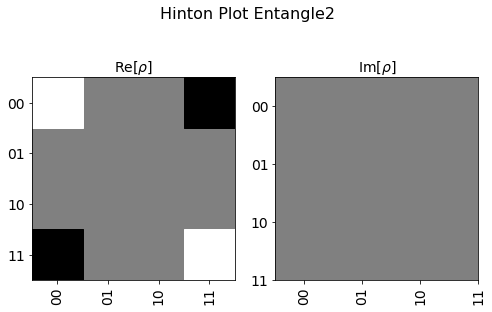

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.z(0)

state = DensityMatrix.from_instruction(qc)
plot_state_hinton(state, title="Hinton Plot Entangle2")

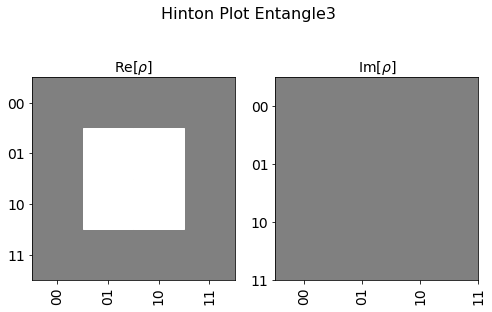

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0,1)

state = DensityMatrix.from_instruction(qc)
plot_state_hinton(state, title="Hinton Plot Entangle3")

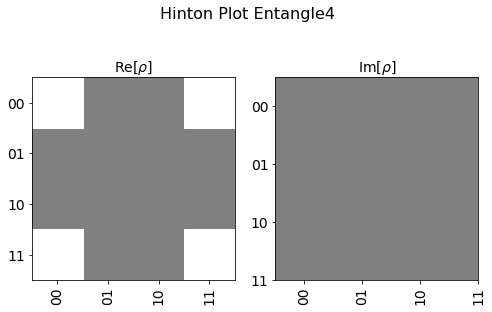

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0,1)
qc.x(1)

state = DensityMatrix.from_instruction(qc)
plot_state_hinton(state, title="Hinton Plot Entangle4")

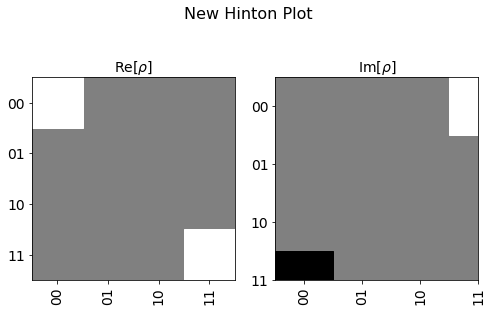

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.s(0)

state = DensityMatrix.from_instruction(qc)
plot_state_hinton(state, title="New Hinton Plot")

### plot_error_map()メソッドの使用方法

ibmqfactory.load_account:WARNING:2022-08-24 13:07:20,254: Credentials are already in use. The existing account in the session will be replaced.


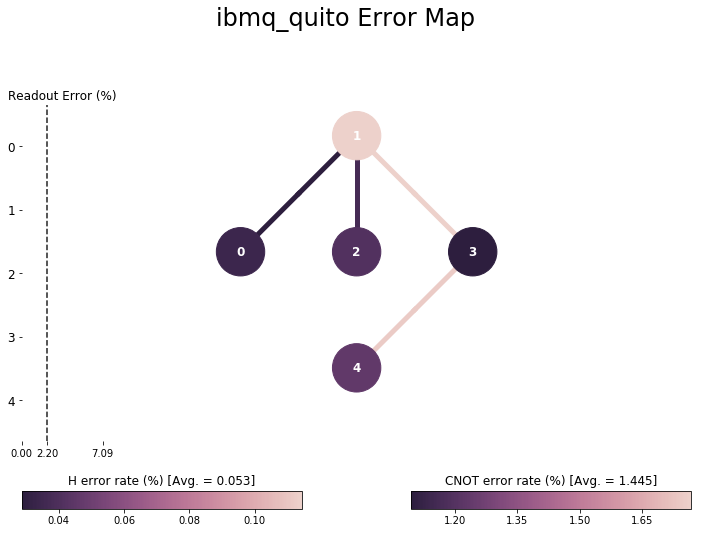

In [ ]:
from qiskit import QuantumCircuit, execute, IBMQ
from qiskit.visualization import plot_error_map
%matplotlib inline

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_quito')
plot_error_map(backend)

## Section 10: Access Aer Provider

BasicAerと同じ